In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_excel('INC_3.xlsx')
data.head()

,t1,t2,t3,t4,h1,h2,h3,h4,h5,h6,h7,h8,h9,mi1,mi2,mi3,mi4,mi5,mi6,mi7,mi8,mi9,mi10,mi11,cototal,npersons,nwkany5,rurban,alcohol,tb,migration,tobacco,land,tractor,livestock,kisancredit,houseown,tv,ac,cell,refrigerator,dishtv,car,washingmach,computer,shares,fd,savingsacc,postofacc,electricity,lpg,medicalexp,eduexp,cycle,motorcycle,hheduc,mheadage,fheadage,income
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,256288,9,3,0,0,0,0,0,2,0,1,0,1,1,0,1,1,1,0,1,0,0,0,1,0,1,1,7000,10500,0,0,9,57,49,176100
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,640500,16,5,0,0,0,0,1,0,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1,0,1,1,3000,119200,0,0,16,76,0,1039150
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,109224,7,2,0,0,0,0,0,2,0,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,11,45,43,182340
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,100966,5,2,0,0,0,0,0,4,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,300,0,0,0,57,47,90760
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,163970,10,2,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1000,5100,0,0,9,50,38,212600


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40883 entries, 0 to 40882
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   t1            40883 non-null  int64
 1   t2            40883 non-null  int64
 2   t3            40883 non-null  int64
 3   t4            40883 non-null  int64
 4   h1            40883 non-null  int64
 5   h2            40883 non-null  int64
 6   h3            40883 non-null  int64
 7   h4            40883 non-null  int64
 8   h5            40883 non-null  int64
 9   h6            40883 non-null  int64
 10  h7            40883 non-null  int64
 11  h8            40883 non-null  int64
 12  h9            40883 non-null  int64
 13  mi1           40883 non-null  int64
 14  mi2           40883 non-null  int64
 15  mi3           40883 non-null  int64
 16  mi4           40883 non-null  int64
 17  mi5           40883 non-null  int64
 18  mi6           40883 non-null  int64
 19  mi7           40883 non-n

In [53]:
data.describe()

,t1,t2,t3,t4,h1,h2,h3,h4,h5,h6,h7,h8,h9,mi1,mi2,mi3,mi4,mi5,mi6,mi7,mi8,mi9,mi10,mi11,cototal,npersons,nwkany5,rurban,alcohol,tb,migration,tobacco,land,tractor,livestock,kisancredit,houseown,tv,ac,cell,refrigerator,dishtv,car,washingmach,computer,shares,fd,savingsacc,postofacc,electricity,lpg,medicalexp,eduexp,cycle,motorcycle,hheduc,mheadage,fheadage,income
count,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,4.088300e+04,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,4.088300e+04,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,4.088300e+04,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,40883.000000,4.088300e+04
mean,0.442262,0.149842,0.305751,0.098378,0.033437,0.230267,0.001981,0.012377,0.284397,0.016804,0.077979,0.325196,0.005039,0.236944,0.008903,0.101827,0.229655,0.016193,0.112981,0.013257,0.197980,0.005699,0.049605,0.026661,1.180479e+05,4.878923,1.879632,0.350757,0.246826,0.016584,0.062838,0.382726,1.806521e+08,0.024387,0.414280,0.050608,0.917741,0.659516,0.186606,0.809701,0.282196,0.530734,0.049434,0.098843,0.055793,0.015826,0.104665,0.575936,0.117726,0.872906,0.470293,6.769503e+03,4681.120833,0.545679,0.288629,8.292298,42.334100,42.252892,1.268387e+05
std,0.496661,0.356921,0.460730,0.297829,0.179777,0.421009,0.044468,0.110562,0.451132,0.128538,0.268141,0.468454,0.070806,0.425213,0.093938,0.302425,0.420616,0.126217,0.316573,0.114376,0.398482,0.075278,0.217130,0.161094,1.188752e+05,2.303151,1.214009,0.477213,0.431170,0.127708,0.242674,0.486058,2.504607e+09,0.163337,0.492603,0.219198,0.274762,0.473878,0.389599,0.392542,0.450074,0.499061,0.216775,0.298455,0.229525,0.124802,0.306124,0.494206,0.322288,0.333083,0.499123,3.393262e+04,17257.744706,0.497915,0.453130,5.024827,21.009139,15.939615,1.589752e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.320000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+03
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.668100e+04,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000e+01,0.000000,0.000000,0.000000,5.000000,34.000000,33.000000,4.160000e+04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.771400e+04,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.000000e+02,80.000000,1.000000,0.000000,9.000000,45.000000,42.000000,7.591000e+04
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,

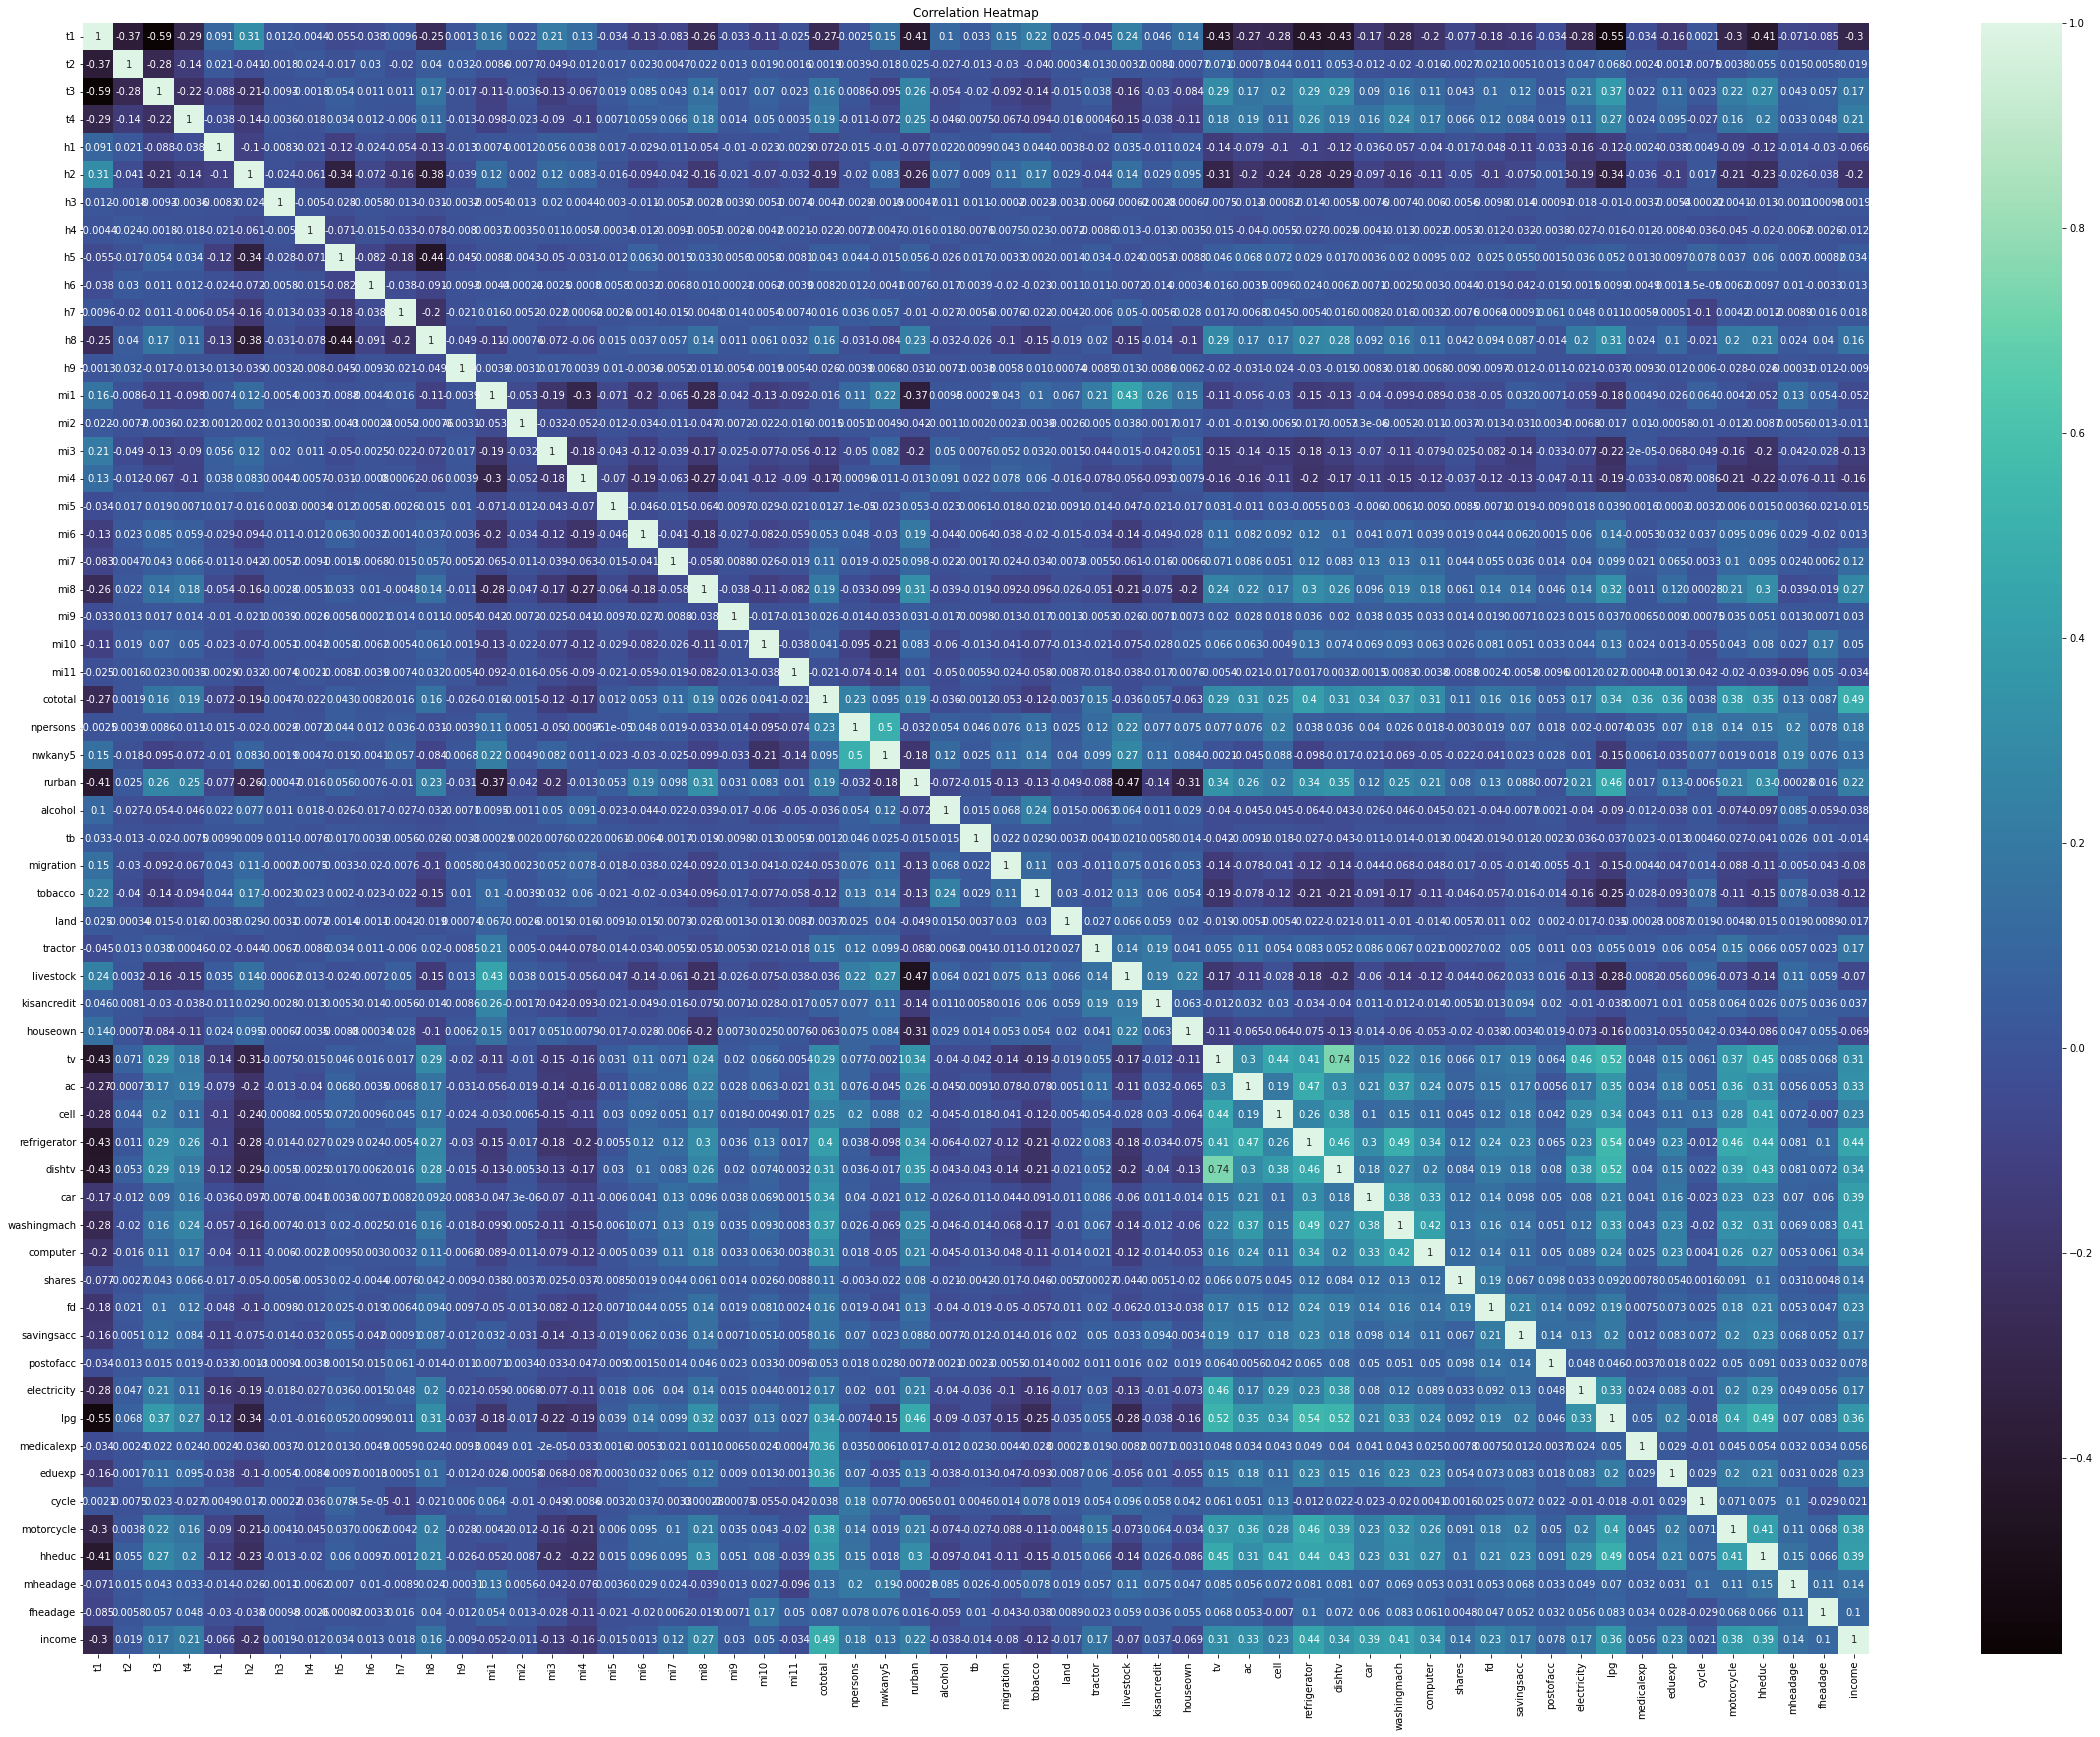

In [54]:
"""corr = data.corr()
plt.figure(figsize=(40,30))
sns.heatmap(corr, annot=True, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()"""

In [55]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [56]:
x.shape

(40883, 58)

In [57]:
y.shape

(40883,)

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
y=sc.fit_transform(y)

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=0)

In [79]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',degree=5)
regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=5, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [80]:
y_pred = regressor.predict(x_test)

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.46082794682859907

In [82]:
"""from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(regressor,x_train,y_train,cv =10)
print('accuracy : {:.2f}%'.format(accuracies.mean()*100))
print('std:{:.3f}%'.format(accuracies.std()*100))"""

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

accuracy : 44.34%
std:3.757%


In [96]:
x_train,x_test1,y_train,y_test1 = train_test_split(x,y,test_size = 0.25,random_state = 0)
x_train,x_test2,y_train,y_test2 = train_test_split(x,y,test_size = 0.25,random_state = 0)
x_train,x_test3,y_train,y_test3 = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [97]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor1.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [98]:
y_pred1 = regressor1.predict(x_test1)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[-0.28 -0.02]
 [ 0.22  0.58]
 [-0.31  0.67]
 ...
 [-0.36 -0.7 ]
 [-0.15 -0.43]
 [-0.68 -0.64]]


In [99]:
from sklearn.metrics import r2_score
r2_score(y_test1, y_pred1)

0.4072571260838077

In [100]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state = 0)
regressor2.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [101]:
y_pred2 = regressor2.predict(x_test2)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[ 0.09 -0.02]
 [-0.22  0.58]
 [-0.31  0.67]
 ...
 [-0.55 -0.7 ]
 [ 0.69 -0.43]
 [-0.64 -0.64]]


In [102]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

-0.1590609566991228

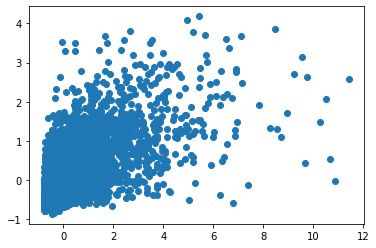

In [94]:
plt.scatter(y_test,y_pred)